
# Week 10 — Relationships & Modeling

**Course:** DATS 2102 · Data Visualization for Data Science  

**Dataset:** Boston Housing (MASS via `statsmodels`)  
> Note: `sklearn.datasets.load_boston()` is **deprecated** due to ethical concerns. We use the public MASS *Boston* dataset via `statsmodels` for educational purposes.


## Environment setup

In [5]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set_theme()


In [6]:
# Load Boston Housing data from MASS via statsmodels
boston = sm.datasets.get_rdataset("Boston", "MASS").data
df = boston.rename(columns=str.lower)

# Quick peek
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



### Variables (subset)

- **medv**: Median value of owner-occupied homes ($1000s)  
- **rm**: Average number of rooms per dwelling  
- **lstat**: % lower status of the population  
- **chas**: Charles River dummy (1 if tract bounds river)  
- **nox**: Nitric oxides concentration (parts per 10 million)  
- **ptratio**: Pupil–teacher ratio by town  


## scatterplot

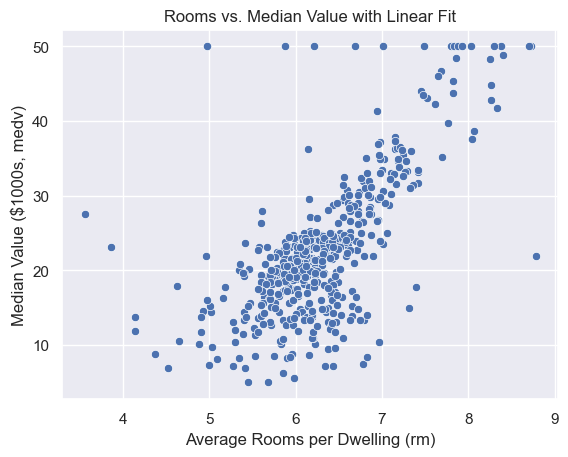

In [7]:
sns.scatterplot(data=df, x="rm", y="medv")
plt.title("Rooms vs. Median Value with Linear Fit")
plt.xlabel("Average Rooms per Dwelling (rm)")
plt.ylabel("Median Value ($1000s, medv)")
plt.show()

## Basic scatter + marginal histograms
`jointplot` combines a **bivariate plot** in the center (joint) with **marginal distributions** along axes.

Text(0.5, 1.02, 'Rooms vs Median Value — scatter + marginal hist')

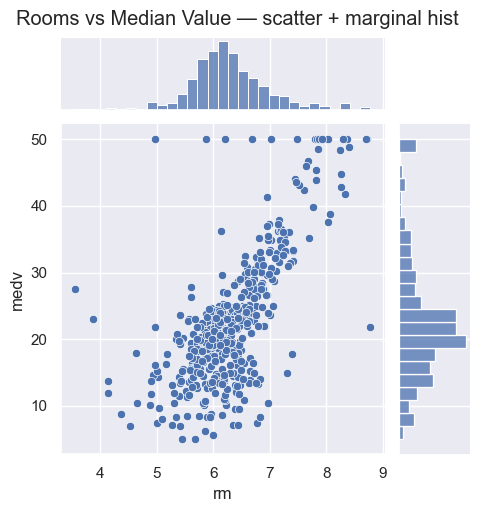

In [8]:
g = sns.jointplot(
    data=df, x="rm", y="medv",
    kind="scatter", height=5, ratio=4, space=0.2
)
g.fig.suptitle("Rooms vs Median Value — scatter + marginal hist", y=1.02)

## Scatterplot with regression line (rooms vs. value)

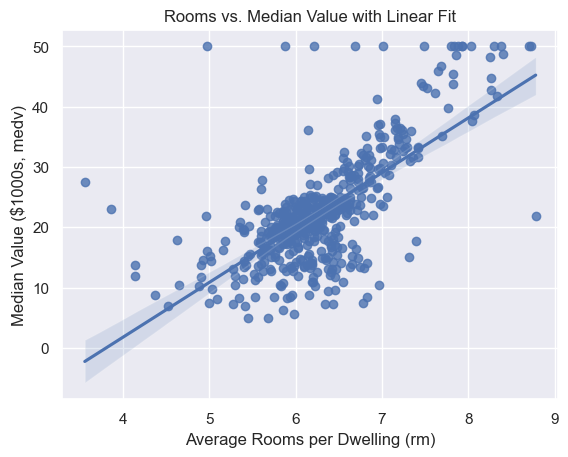

In [9]:
sns.regplot(data=df, x="rm", y="medv")
plt.title("Rooms vs. Median Value with Linear Fit")
plt.xlabel("Average Rooms per Dwelling (rm)")
plt.ylabel("Median Value ($1000s, medv)")
plt.show()

## Scatter with regression line (and 95% CI)


Text(0.5, 1.02, 'Rooms vs Median Value — regression with CI')

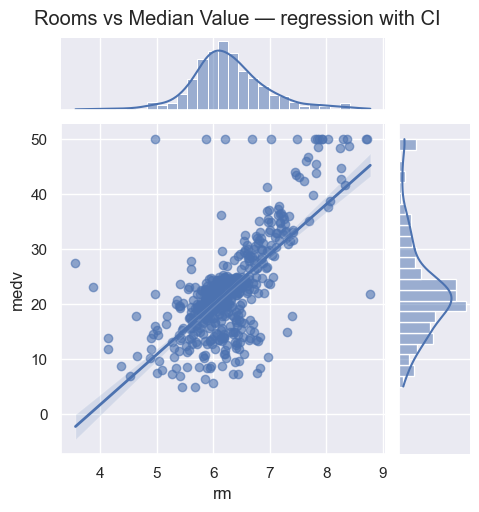

In [10]:
g = sns.jointplot(
    data=df, x="rm", y="medv",
    kind="reg", height=5, ratio=4, space=0.2,
    joint_kws={"line_kws": {"linewidth":2}, "scatter_kws": {"alpha":0.6}, 'ci': 80}
    # joint_kws={"line_kws": {"linewidth":2}, "scatter_kws": {"alpha":0.6}, 'ci': 95}
)
g.fig.suptitle("Rooms vs Median Value — regression with CI", y=1.02)

## Multivariate visualization using hue/facet
 'chas' is a 0/1 indicator for tracts along the Charles River

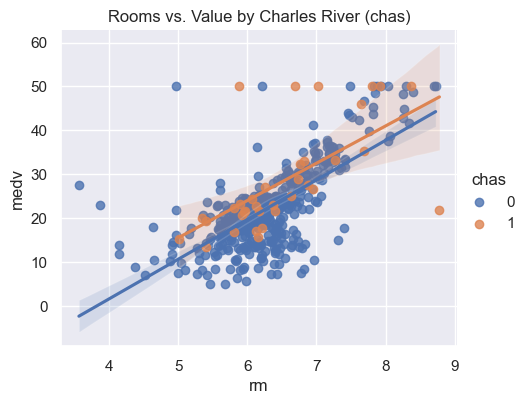

In [11]:
sns.lmplot(data=df, x="rm", y="medv", hue="chas", height=4, aspect=1.2)
plt.title("Rooms vs. Value by Charles River (chas)")
plt.show()

## Correlation matrix heatmap

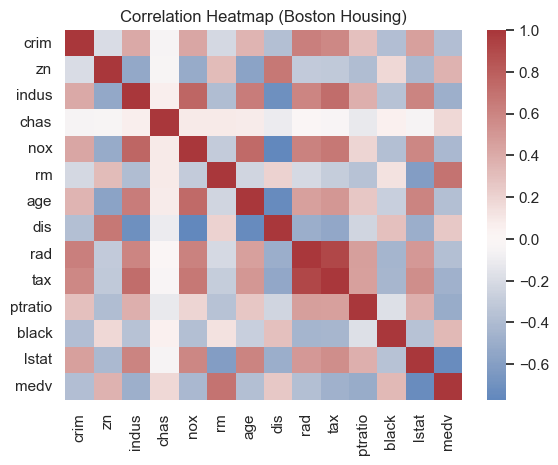

In [12]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="vlag", center=0)
plt.title("Correlation Heatmap (Boston Housing)")
plt.show()

## OLS: medv ~ rm

In [13]:
X = sm.add_constant(df["rm"])
y = df["medv"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.49e-74
Time:                        02:38:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

## Residuals diagnostics

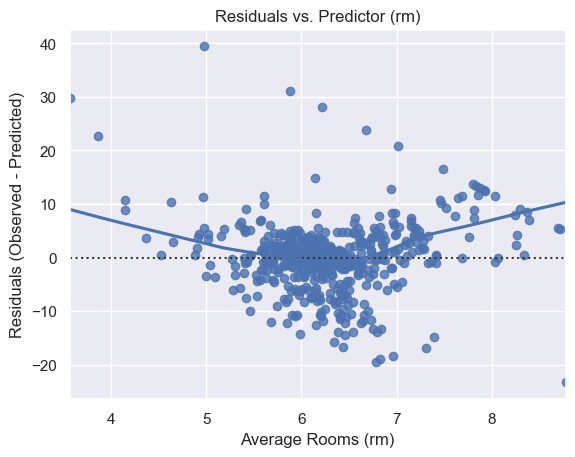

In [14]:
sns.residplot(x=df["rm"], y=df["medv"], lowess=True)
plt.title("Residuals vs. Predictor (rm)")
plt.xlabel("Average Rooms (rm)")
plt.ylabel("Residuals (Observed - Predicted)")
plt.show()

## Predicted vs Actual

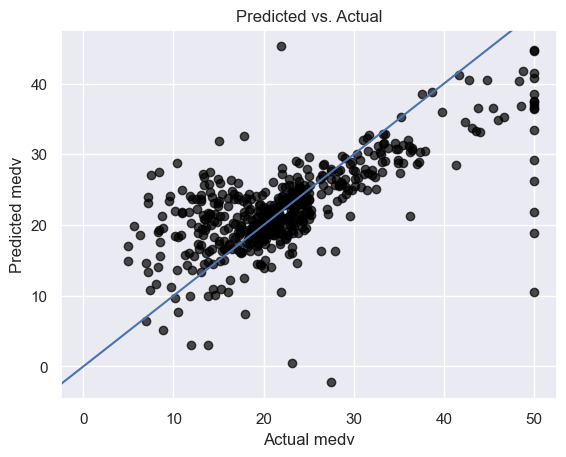

In [15]:
X = sm.add_constant(df["rm"])
y = df["medv"]
model = sm.OLS(y, X).fit()
pred = model.predict(X)

plt.figure()
plt.scatter(y, pred, alpha=0.7, color = "black")
plt.xlabel("Actual medv")
plt.ylabel("Predicted medv")
plt.title("Predicted vs. Actual")
plt.axline((0,0), slope=1)
plt.show()

## Nonlinear relationship example (quadratic)


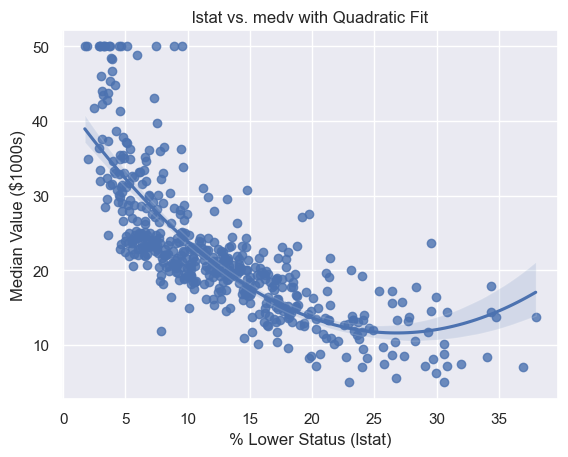

In [16]:
sns.regplot(data=df, x="lstat", y="medv", order=2)
plt.title("lstat vs. medv with Quadratic Fit")
plt.xlabel("% Lower Status (lstat)")
plt.ylabel("Median Value ($1000s)")
plt.show()

## Q–Q plot (normality of residuals)

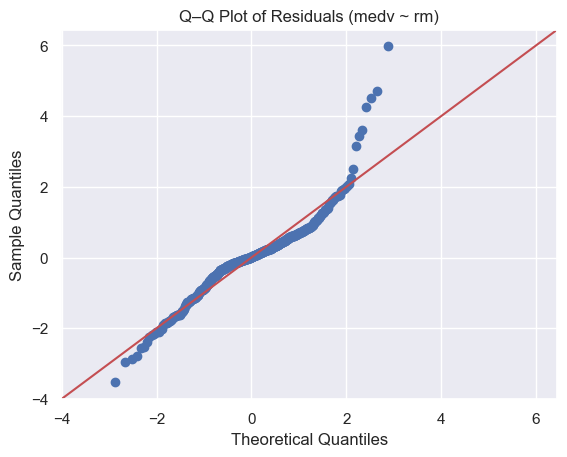

In [17]:
fitted_vals = model.fittedvalues
residuals = model.resid

sm.qqplot(residuals, line="45", fit=True)
plt.title("Q–Q Plot of Residuals (medv ~ rm)")
plt.show()


## Residual histogram (shape/symmetry)

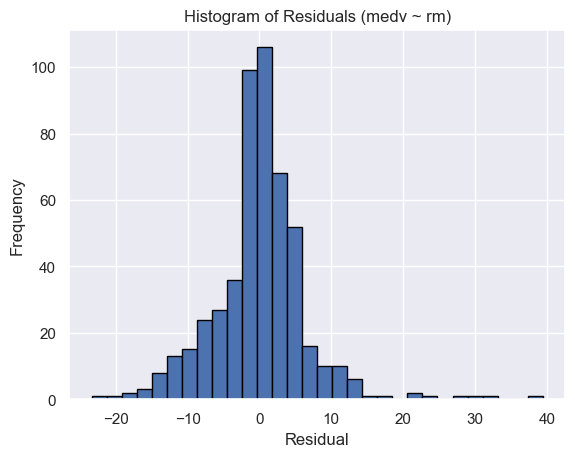

In [18]:
plt.hist(residuals, bins=30, edgecolor="black")
plt.title("Histogram of Residuals (medv ~ rm)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


## Heteroscedasticity

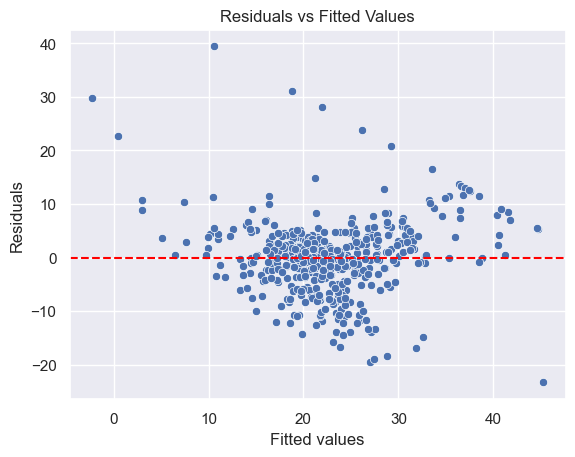

In [19]:
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()



## Locally Weighted Scatterplot Smoothing (LOWESS) guide line on residuals vs. fitted

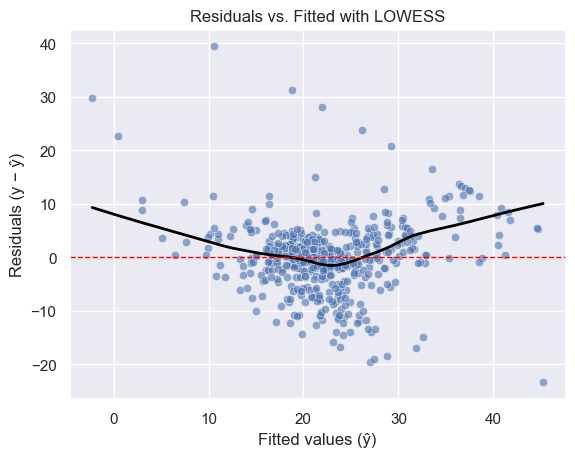

In [20]:
from statsmodels.nonparametric.smoothers_lowess import lowess

sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.6)
lo = lowess(residuals, fitted_vals, frac=0.6)
plt.plot(lo[:,0], lo[:,1], color="black", linewidth=2)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Residuals vs. Fitted with LOWESS")
plt.xlabel("Fitted values (ŷ)")
plt.ylabel("Residuals (y − ŷ)")
plt.show()


In [21]:
import altair as alt
import statsmodels.api as sm

alt.renderers.enable('default')  # Jupyter

RendererRegistry.enable('default')

In [22]:
df = df.astype({'rm': 'float64', 'medv': 'float64'})

df.head()

# Define base scatter plot
base = alt.Chart(boston).mark_circle(opacity=0.6).encode(
    x=alt.X('rm:Q', title='Average Rooms per Dwelling (rm)'),
    y=alt.Y('medv:Q', title='Median Value ($1000s, medv)'),
    tooltip=['rm', 'medv']
)
# base.interactive()

# # Add regression line using transform_regression
reg = base.transform_regression('rm', 'medv').mark_line(color='red')
# reg.interactive()

# # Combine and display
(base + reg).properties(
    title='Altair: Rooms vs Median Value with Regression'
).interactive()

alt.LayerChart(...)

In [23]:
# 2) Faceted comparisons by Charles River dummy (chas)
facet_plot = base.encode(color=alt.Color('chas:N', title='Along Charles River (chas)')).properties(
    title='Altair: Rooms vs Value by Charles River (chas)'
).facet(column='chas:N')

facet_plot

alt.FacetChart(...)

In [24]:
base2 = alt.Chart(boston).mark_point(opacity=0.6).encode(
    x=alt.X('lstat', title='% Lower Status (lstat)'),
    y=alt.Y('medv', title='Median Value ($1000s)'),
    tooltip=['lstat', 'medv']
)

quad = base2.transform_regression(
    'lstat', 'medv', method='poly', order=2
).mark_line()

(base2 + quad).properties(title='Altair: Quadratic Fit (lstat vs medv)').interactive()

alt.LayerChart(...)

In [25]:
from sklearn.datasets import load_diabetes


In [26]:
diab = load_diabetes()
diab_df = pd.DataFrame(diab.data, columns=diab.feature_names)
diab_df['target'] = diab.target

In [27]:
import plotly.express as px

# 1) Scatter + trendline: bmi vs target
fig = px.scatter(
    diab_df, x='bmi', y='target', trendline='ols',
    title='Plotly: BMI vs Diabetes Target with OLS Trendline'
)
fig

In [28]:
# 2) Add color by a third variable (e.g., bp) and hover data
fig = px.scatter(
    diab_df, x='bmi', y='target', color='bp',
    hover_data=['s1','s2','s3','s4','s5','s6'],
    trendline='ols',
    title='Plotly: BMI vs Target colored by Blood Pressure (bp)'
)
fig

In [29]:
# 3) Residuals dashboard: compute and plot
X = sm.add_constant(diab_df[['bmi']])
y = diab_df['target']
m = sm.OLS(y, X).fit()
diab_df['pred_bmi'] = m.predict(X)
diab_df['resid_bmi'] = y - diab_df['pred_bmi']

# Predicted vs Actual
fig1 = px.scatter(
    diab_df, x='target', y='pred_bmi', title='Predicted vs Actual (BMI model)'
)
fig1.add_shape(type='line', x0=diab_df['target'].min(), y0=diab_df['target'].min(),
               x1=diab_df['target'].max(), y1=diab_df['target'].max())

# Residuals vs Predictor
fig2 = px.scatter(
    diab_df, x='bmi', y='resid_bmi', title='Residuals vs Predictor (bmi)'
)

fig1, fig2

(Figure({
     'data': [{'hovertemplate': 'target=%{x}<br>pred_bmi=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': {'bdata': ('AAAAAADgYkAAAAAAAMBSQAAAAAAAoG' ... 'AAAIBgQAAAAAAAgGtAAAAAAACATEA='),
                     'dtype': 'f8'},
               'xaxis': 'x',
               'y': {'bdata': ('Bcy+obhWakAVsFTPx9BZQCA5a/rISm' ... 'YwAiFhQDgbIRYOp2dA2sADrfCyVEA='),
                     'dtype': 'f8'},
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'shapes': [{'type': 'line',
                            'x0': np.float64(25.0),
                            'x1': np.float64(346.0),
                            'y0': np.float64(25.0),
                            'y1': np.float64(346.0)}],


In [30]:
# 4) Nonlinear example: add a quadratic term
diab_df['bmi2'] = diab_df['bmi'] ** 2
X2 = sm.add_constant(diab_df[['bmi','bmi2']])
m2 = sm.OLS(y, X2).fit()
diab_df['pred_quad'] = m2.predict(X2)

fig = px.scatter(
    diab_df, x='bmi', y='target', title='Plotly: Quadratic Fit (BMI^2)'
)
fig.add_traces(px.line(diab_df.sort_values('bmi'), x='bmi', y='pred_quad').data)
fig

In [39]:
preds = ["bmi","bp","s1","s2","s3","s4","s5","s6"]
buttons = []
y_np = y.to_numpy()  # y is pandas Series

for p in preds:
    Xp = sm.add_constant(df[[p]])
    mp = sm.OLS(y, Xp).fit()
    fitted_p = mp.predict(Xp).to_numpy()
    resid_p  = (y - mp.predict(Xp)).to_numpy()

    xline = [fitted_p.min(), fitted_p.max()]
    yline = [fitted_p.min(), fitted_p.max()]

    buttons.append(dict(
        label=p,
        method="update",
        args=[
            # Update x/y for: [top scatter, diagonal line, bottom scatter]
            {"x": [fitted_p, xline, fitted_p],
             "y": [y_np,    yline, resid_p]},
            {"title": f"Residuals Panel — OLS with predictor '{p}'"}
        ],
    ))

fig.update_layout(
    updatemenus=[dict(type="dropdown", x=1.02, y=1, xanchor="left",
                      buttons=buttons, showactive=True)]
)


FigureWidget({
    'data': [{'marker': {'opacity': 0.8, 'size': 7},
              'mode': 'markers',
              'name': 'Actual vs Fitted',
              'selected': {'marker': {'color': 'crimson', 'size': 9}},
              'type': 'scatter',
              'uid': 'e66e4b15-7acd-4a8e-ad8f-078747e148a8',
              'unselected': {'marker': {'opacity': 0.2}},
              'x': {'bdata': ('Bcy+obhWakAVsFTPx9BZQCA5a/rISm' ... 'YwAiFhQDgbIRYOp2dA2sADrfCyVEA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAADgYkAAAAAAAMBSQAAAAAAAoG' ... 'AAAIBgQAAAAAAAgGtAAAAAAACATEA='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'line': {'dash': 'dash'},
              'mode': 'lines',
              'name': 'y = x',
              'selectedpoints': [],
              'type': 'scatter',
              'uid': 'ec35b57c-3967-48c6-a918-51a348766eb4',
              'x': [66.42293509524849, 314.0646295516874],
          

In [37]:
# Interactive residuals panel with TWO-WAY linking (top <-> bottom)

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import statsmodels.api as sm
from sklearn.datasets import load_diabetes

# If you're in classic Jupyter or VS Code:
# pio.renderers.default = "jupyterlab"  # try "vscode" or "jupyterlab" if needed

# --- Data & model
diab = load_diabetes()
df = pd.DataFrame(diab.data, columns=diab.feature_names)
df["target"] = diab.target

pred = "bmi"
X = sm.add_constant(df[[pred]])
y = df["target"]
m = sm.OLS(y, X).fit()
df["fitted"] = m.predict(X)
df["resid"]  = y - df["fitted"]

# --- Build FigureWidget with two linked charts
base = make_subplots(
    rows=2, cols=1, shared_xaxes=False,
    subplot_titles=(f"Actual vs Fitted (predictor: {pred})", "Residuals vs Fitted"),
    vertical_spacing=0.12
)
fig = go.FigureWidget(base)
fig.update_layout(height=650, width=800, dragmode="select", title="Linked Residuals Panel")

# Top: Actual vs Fitted (selectable)
top_scatter = go.Scatter(
    x=df["fitted"], y=df["target"],
    mode="markers", name="Actual vs Fitted",
    marker=dict(size=7, opacity=0.8),
    selected=dict(marker=dict(color="crimson", size=9)),
    unselected=dict(marker=dict(opacity=0.2)),
)

diag_line = go.Scatter(
    x=[df["fitted"].min(), df["fitted"].max()],
    y=[df["fitted"].min(), df["fitted"].max()],
    mode="lines", name="y = x", line=dict(dash="dash")
)

# Bottom: Residuals vs Fitted (selectable)
bottom_scatter = go.Scatter(
    x=df["fitted"], y=df["resid"],
    mode="markers", name="Residuals",
    marker=dict(size=7, opacity=0.8),
    selected=dict(marker=dict(color="crimson", size=9)),
    unselected=dict(marker=dict(opacity=0.2)),
)

fig.add_trace(top_scatter, 1, 1)
fig.add_trace(diag_line, 1, 1)
fig.add_trace(bottom_scatter, 2, 1)

fig.update_xaxes(title_text="Fitted (ŷ)", row=1, col=1)
fig.update_yaxes(title_text="Actual (y)", row=1, col=1)
fig.update_xaxes(title_text="Fitted (ŷ)", row=2, col=1)
fig.update_yaxes(title_text="Residual (y − ŷ)", row=2, col=1)
fig.add_hline(y=0, line_dash="dash", row=2, col=1)

# --- Two-way linking handlers
top = fig.data[0]      # top_scatter
bottom = fig.data[2]   # bottom_scatter

def link_top_to_bottom(trace, points, selector):
    # Select in TOP -> highlight same indices in BOTTOM
    inds = points.point_inds or None  # None clears selection
    bottom.selectedpoints = inds

def link_bottom_to_top(trace, points, selector):
    # Select in BOTTOM -> highlight same indices in TOP
    inds = points.point_inds or None
    top.selectedpoints = inds

top.on_selection(link_top_to_bottom)
bottom.on_selection(link_bottom_to_top)

# Optional: clear the other plot’s selection when user double-clicks background
def clear_on_deselect(layout, relayout):
    # Double-click often changes axis range; clear selections
    top.selectedpoints = None
    bottom.selectedpoints = None

fig.layout.on_change(clear_on_deselect, "xaxis", "yaxis", "xaxis2", "yaxis2")

fig  # In Jupyter, simply put `fig` as the last line to display


FigureWidget({
    'data': [{'marker': {'opacity': 0.8, 'size': 7},
              'mode': 'markers',
              'name': 'Actual vs Fitted',
              'selected': {'marker': {'color': 'crimson', 'size': 9}},
              'type': 'scatter',
              'uid': 'd09bbc3b-fc13-49b8-acab-55e03789dd1c',
              'unselected': {'marker': {'opacity': 0.2}},
              'x': {'bdata': ('Bcy+obhWakAVsFTPx9BZQCA5a/rISm' ... 'YwAiFhQDgbIRYOp2dA2sADrfCyVEA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAADgYkAAAAAAAMBSQAAAAAAAoG' ... 'AAAIBgQAAAAAAAgGtAAAAAAACATEA='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'line': {'dash': 'dash'},
              'mode': 'lines',
              'name': 'y = x',
              'type': 'scatter',
              'uid': '950d4786-5e07-4d86-9226-7360e15d2517',
              'x': [66.42293509524849, 314.0646295516874],
              'xaxis': 'x',
              'y':